## <font color=red> Set Networkx Environment</font>

In [1]:
%time # get time of execution of cell

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [2]:
import timeit
import time

### Read graph from CSV

In [3]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
from matplotlib import pyplot as plt
plt.figure(figsize=(35,35))
import random

g = nx.read_weighted_edgelist('London_Edgelist_600.csv',delimiter=',', create_using=nx.Graph(), nodetype=int)
print (nx.info(g))

# node_sizes = [random.randrange(1, 10) for _ in range(0, 44)]
# node_sizes_times_scale = [i * 250 for i in node_sizes]
# print(node_sizes_times_scale)

pos = nx.spring_layout(g,seed=100)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(g, pos, node_color='g', alpha=1.0,node_shape='8')

# edges
nx.draw_networkx_edges(g, pos,width=6)

# labels
nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')

labels = nx.get_edge_attributes(g,'weight')
for key, value in labels.items():
    labels[key]=round(value, 1)
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels, font_size=15)

plt.axis('off')
plt.show()

Name: 
Type: Graph
Number of nodes: 276
Number of edges: 340
Average degree:   2.4638


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 3500x3500 with 1 Axes>

#### is my network connected?

In [4]:
print(nx.is_connected(g))
print(nx.number_connected_components(g))
largest_cc = max(nx.connected_components(g), key=len)
print(len(largest_cc))
print(largest_cc)


S = [g.subgraph(c).copy() for c in nx.connected_components(g)]
#print(S)

False
9
195
{514, 515, 5, 6, 7, 8, 10, 11, 522, 525, 14, 524, 17, 18, 19, 530, 21, 533, 23, 24, 25, 538, 30, 31, 32, 546, 36, 39, 553, 43, 557, 45, 46, 48, 49, 51, 563, 566, 55, 568, 60, 62, 64, 65, 66, 578, 68, 69, 576, 583, 72, 587, 75, 76, 590, 79, 77, 82, 594, 85, 598, 599, 89, 91, 606, 96, 97, 610, 100, 101, 103, 616, 108, 621, 110, 111, 116, 119, 120, 127, 639, 132, 135, 138, 139, 654, 146, 149, 153, 154, 156, 668, 162, 165, 170, 171, 686, 175, 180, 181, 183, 696, 185, 700, 194, 197, 199, 203, 208, 209, 213, 218, 219, 730, 223, 735, 227, 232, 234, 238, 239, 240, 242, 243, 755, 245, 247, 760, 249, 251, 255, 256, 259, 262, 774, 265, 269, 272, 275, 278, 281, 796, 287, 289, 293, 297, 298, 302, 303, 306, 314, 318, 322, 325, 326, 330, 333, 335, 341, 342, 343, 345, 353, 360, 362, 365, 369, 386, 387, 394, 395, 397, 403, 406, 414, 926, 416, 421, 425, 436, 441, 451, 453, 455, 464, 467, 469, 478, 482, 494, 495, 1007, 501, 504, 510}


## work with largest connected graph and Set Node Sizes (capacities)

Name: 
Type: Graph
Number of nodes: 195
Number of edges: 263
Average degree:   2.6974
195
[750, 2000, 2000, 750, 1750, 1500, 1750, 2250, 500, 2250, 500, 500, 2000, 1250, 250, 1000, 1500, 1000, 1250, 1000, 750, 750, 1000, 1500, 1500, 1750, 1000, 1750, 2000, 2250, 1250, 1750, 750, 500, 750, 250, 1750, 750, 750, 1000, 750, 250, 1000, 2000, 1750, 750, 2250, 250, 1000, 2250, 1250, 1500, 2250, 1500, 2250, 1500, 2000, 1750, 250, 500, 1250, 1750, 1250, 1000, 1750, 2250, 2000, 1250, 750, 250, 1500, 750, 250, 1250, 500, 250, 1000, 1250, 2250, 1000, 1500, 1500, 2000, 250, 500, 2000, 1000, 2250, 500, 1000, 250, 1750, 500, 1750, 750, 2000, 2250, 250, 2000, 750, 250, 2000, 250, 1000, 1000, 750, 500, 250, 750, 1000, 500, 500, 1250, 500, 1750, 250, 2250, 1750, 2000, 2000, 1500, 2000, 2250, 1000, 1250, 1750, 750, 1000, 1750, 500, 1250, 1750, 1250, 500, 1000, 1000, 250, 1750, 1250, 250, 1250, 1250, 250, 250, 2250, 1250, 1000, 1750, 250, 500, 1000, 1250, 250, 500, 1500, 1500, 2000, 250, 750, 500, 250, 15

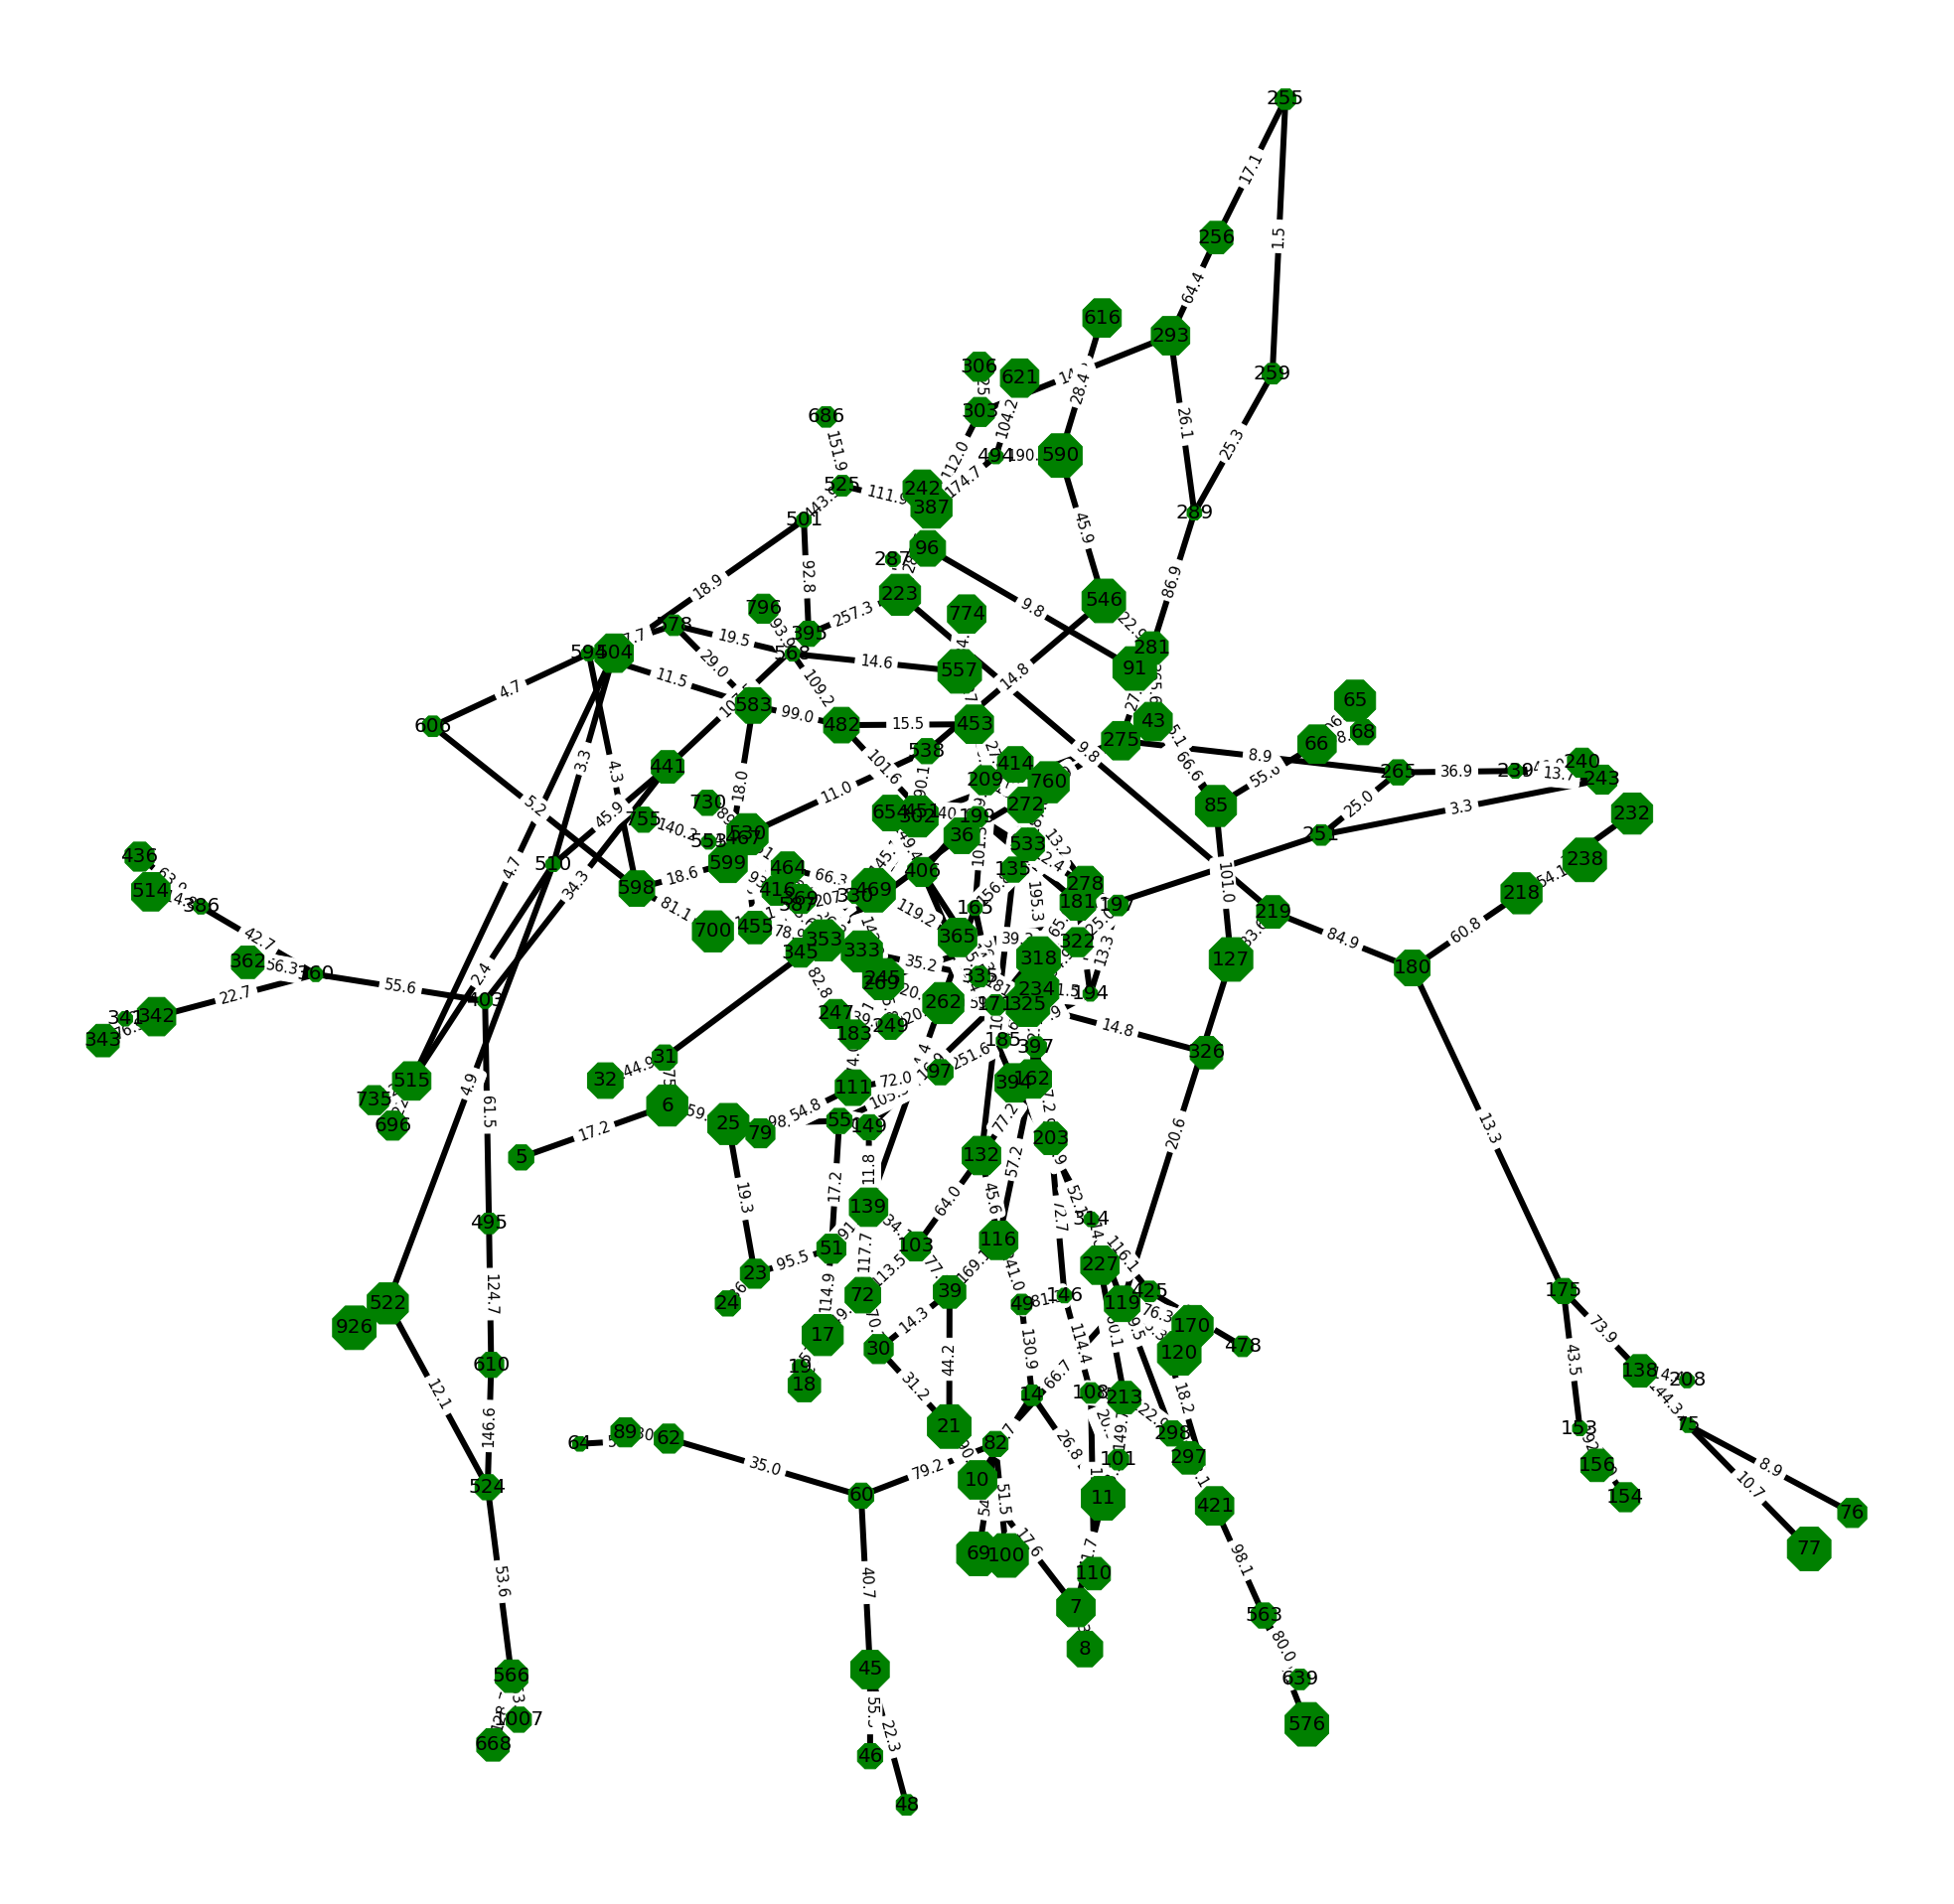

In [5]:
plt.figure(figsize=(35,35))
graphs = list(nx.connected_component_subgraphs(g))
largest_graph=max(nx.connected_component_subgraphs(g), key=len)
print (nx.info(largest_graph))
print (len(largest_graph))

random.seed(100)
node_sizes = [random.randrange(1, 10) for _ in range(0, len(largest_graph))]
node_sizes_times_scale = [i * 250 for i in node_sizes]
print(node_sizes_times_scale)

pos1 = nx.spring_layout(largest_graph,seed=100)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(largest_graph, pos1,node_size=node_sizes_times_scale, node_color='g', alpha=1.0,node_shape='8')

# edges
nx.draw_networkx_edges(largest_graph, pos1,width=6)

# labels
nx.draw_networkx_labels(largest_graph, pos1, font_size=20, font_family='sans-serif')

labels1 = nx.get_edge_attributes(largest_graph,'weight')
for key1, value1 in labels1.items():
    labels1[key1]=round(value1, 1)
nx.draw_networkx_edge_labels(largest_graph,pos1,edge_labels=labels1, font_size=15)
plt.axis('off')
plt.show()

### Retrieve Node size

In [6]:
node_list = list(largest_graph.nodes())
count_dict = { k:v for k,v in zip(node_list,node_sizes)}
nx.set_node_attributes(largest_graph, count_dict, 'sizes')
largest_graph.node[30]['sizes']

4

### Retreive Edge Length

In [7]:
print(largest_graph.get_edge_data(43, 36))

{'weight': 22.88440397}


### Retreive Dijkstra shortest path between two nodes

In [8]:
print (nx.single_source_dijkstra(largest_graph, 68, target=17, cutoff=None, weight='weight'))

(1227.829908043, [68, 66, 85, 43, 36, 31, 6, 25, 23, 51, 17])


## <font color=red> Synthesize Requests</font>

#### pacakges and weights .. from which node to which node

### Select Fixed source and Random Destination Node

In [9]:
all_nodes=list(largest_graph.nodes)
print(all_nodes)
all_nodes.remove(132)
print(all_nodes)
#random.sample(largest_graph.nodes,2)

[5, 6, 25, 31, 7, 8, 10, 11, 14, 21, 101, 49, 17, 18, 19, 51, 72, 30, 39, 23, 24, 55, 79, 32, 36, 43, 103, 116, 85, 91, 281, 45, 46, 48, 60, 146, 139, 97, 149, 62, 82, 64, 89, 65, 66, 68, 69, 75, 76, 77, 138, 111, 100, 119, 127, 96, 223, 242, 185, 108, 213, 132, 110, 183, 162, 120, 170, 219, 135, 165, 272, 175, 208, 203, 171, 153, 154, 156, 318, 209, 181, 180, 218, 194, 199, 245, 247, 234, 197, 322, 451, 227, 397, 453, 298, 232, 238, 287, 387, 395, 314, 262, 239, 240, 243, 265, 251, 330, 249, 345, 269, 255, 256, 259, 293, 289, 325, 275, 333, 353, 278, 302, 546, 303, 297, 421, 538, 306, 394, 425, 533, 365, 326, 335, 416, 369, 341, 342, 343, 360, 455, 362, 386, 403, 469, 464, 436, 514, 494, 525, 406, 441, 501, 495, 414, 654, 530, 553, 563, 478, 510, 482, 557, 467, 730, 587, 568, 583, 590, 621, 610, 504, 515, 522, 696, 735, 524, 926, 566, 686, 760, 755, 774, 576, 639, 668, 1007, 578, 796, 594, 599, 700, 616, 598, 606]
[5, 6, 25, 31, 7, 8, 10, 11, 14, 21, 101, 49, 17, 18, 19, 51, 72, 30, 3

#### Get Longest Path in Network

In [10]:
def get_longest_path(source_node):
    distance_list=[]
    for i,v in enumerate(all_nodes):
        distance= nx.single_source_dijkstra(largest_graph, source_node, target=v, cutoff=None, weight='weight')[0]
        distance_list.append(distance)
    
    return(max(distance_list))
    

In [11]:
longest_distance=get_longest_path(132)
print(longest_distance)

2291.4705835209998


### Generate n random requests of max x packages and add profit and RTT

In [12]:
max_drones=10
requests_number=200

In [13]:
from datetime import datetime, timedelta
from decimal import Decimal

#print(datetime(1))

def generate_packages(requests,max_packages,max_weight,longest_distance):
    requests_list=[]
    random.seed(100)
    id=0
    for x in range(requests):
        packages=[ round(random.uniform(0.1,max_weight), 1) for i in range(random.randrange(2,max_packages)) ]
        nodes = random.sample(all_nodes,1)
        source_node=132
        destination_node=nodes[0]
        random_start_time=random.sample([9,10,11,12,13,14,15,16],1)[0]
        start_time= datetime(2020, 1, 1, random_start_time, 0, 0)
        end_time=datetime(2020, 1, 1, random_start_time+1, 0, 0)
        ##Profit from request
        #distance between source and distination
        distance= nx.single_source_dijkstra(largest_graph, source_node, target=destination_node, cutoff=None, weight='weight')[0]
        #print(distance)
        #print(len(packages))
        #profit=constant*(normalized distance+ normalized drones)
        temp_profit=Decimal(35*((distance/longest_distance)+(len(packages)/max_packages)))
        profit=float(round(temp_profit,2))
        
        ##Round Trip Time
        temp_RTT= int(59*((distance/longest_distance)+(len(packages)/max_packages)))
        #print(temp_RTT)
        RTT=datetime(2020, 1, 1, int(temp_RTT/60), temp_RTT%60, 0)
        request= {'Request_ID':id,'Packages weights': packages, 'source_node':source_node, 'destination_node':destination_node,'start_time':start_time,'end_time':end_time, 'profit':profit, 'RTT':RTT}
        id+=1
        requests_list.append(request)
    return requests_list

In [14]:
requests_list = generate_packages(requests_number,max_drones,5,longest_distance)
#print (requests_list)

In [15]:
requests_list[4]

{'Request_ID': 4,
 'Packages weights': [1.0, 4.2, 4.6, 1.3],
 'source_node': 132,
 'destination_node': 289,
 'start_time': datetime.datetime(2020, 1, 1, 15, 0),
 'end_time': datetime.datetime(2020, 1, 1, 16, 0),
 'profit': 31.36,
 'RTT': datetime.datetime(2020, 1, 1, 0, 52)}

## All possible combinations

In [16]:
import itertools
def all_possible_combinations(list_size):
    requests_ID_list=list(range(0,list_size))
    #print(requests_ID_list)
    my_list=[]
    for L in range(1, len(requests_ID_list)+1):
        for subset in itertools.combinations(requests_ID_list, L):
            my_list.append(subset)
    print(len(my_list))
    return(my_list)

In [ ]:
possible_combinations=all_possible_combinations(requests_number)

### Find best combination

In [ ]:
import copy
def brute_force(poss_combin,r):
    requests_list=copy.deepcopy(r)
    possible_combinations=copy.deepcopy(poss_combin)
    print(len(possible_combinations))
    max_profit=0
    best_combination=[()]
    for i,v in enumerate(possible_combinations):
        time_window=[0] * 8
        print(v)
        combination_profit=0
        for t,u in enumerate (v):
            print (u)
            print(requests_list[u])
            print(requests_list[u]['start_time'].hour)
            time_window[requests_list[u]['start_time'].hour-9]+=len(requests_list[u]['Packages weights'])
            if requests_list[u]['RTT'].hour>0 and requests_list[u]['start_time'].hour<16:
                print('overlapped')
                time_window[requests_list[u]['start_time'].hour-8]+=len(requests_list[u]['Packages weights'])
            if time_window[requests_list[u]['start_time'].hour-9] > max_drones:
                possible_combinations.remove(v)
                print('deleted')
                break
            print(time_window)
            combination_profit+=requests_list[u]['profit']
            print('combination_profit',combination_profit)
        if combination_profit>=max_profit:
            max_profit= combination_profit
            best_combination[0]=v

    print(len(possible_combinations))
    print('max_profit',max_profit)
    print('best_combination',best_combination)
            #if 

In [ ]:
brute_force(possible_combinations,requests_list)